## 1. Intro : Breaking RSA encryption and Order Finding

*In this case, we investigate **how RSA encryption (classical asymmetric cryptography) can be broken using quantum computing**, specially with **Shor's algorithm**.*

- RSA relies on the difficulty of factoring n = p × q
- If we can find the order of a mod n, we can factor n
- Goal: compare classical and quantum methods for order finding


# Python Imports

In [57]:
from math import gcd
from fractions import Fraction
import itertools
import pandas as pd
import numpy as np
import time

# Quantum Programming
import qiskit as qs
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import visualize_transition
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

from IPython.display import display, clear_output, Markdown, HTML
import ipywidgets as widgets

# Plotting (for visualization)
from matplotlib import pyplot as plt

#plt.rc('text', usetex=True)
#plt.rc('text.latex', preamble=r  '\usepackage{braket}') #Use the bracket packege for \ket

## 2. Classical Order Finding (3-4 min)
We search for the smallest positive `r` such that `a^r ≡ 1 mod n`.
This value `r` is called the order of `a modulo n`. It is cruicial for breaking RSA using Shor's algorithm.
We try all values of `r` starting from  and stop when `(a^r) % n == 1`.
In this example, we try `a = 2`, `n = 15`, so we're looking for the order of 2 mod 15 (`a = 2 mod 15`) . 
- Brute-foce code (include timing or iteration count) + output (`a = 2 mod 15`)
- Mention exponential complexity
- Show failure for larger `n` 

In [58]:
def classical_order_finding(a,n):
    r = 1
    remainder = a % n
    iterations = 1
    
    start = time.time()
    
    if gcd(a,n) != 1:
        raise ValueError("a and n must be coprime")
    
    while remainder != 1:
        remainder = (remainder * a) % n
        r += 1
        iterations += 1
        
    end = time.time()
    
    return r, iterations, end - start

# Try with small value
a = 2
n = 15
order, steps, duration = classical_order_finding(a, n)

print(f"Order of {a} mod {n}: r = {order}")
print(f"Iterations needed: {steps}")
print(f"Time taken: {duration:.6f} seconds")

Order of 2 mod 15: r = 4
Iterations needed: 4
Time taken: 0.000003 seconds


Try larger `n`s to see how the classical algorithm struggles

In [59]:
# Caution: Order size does not correlate directly with n 
# Some large n value still yield small r

list_n = [91, 133, 187, 221, 247, 341, 391]

for n in list_n:
    try: 
      r, iterations, t = classical_order_finding(2, n)
      print(f"n = {n}, order = {r}, iterations = {iterations}, time = {t:.6f} sec")
    except:
      continue

n = 91, order = 12, iterations = 12, time = 0.000003 sec
n = 133, order = 18, iterations = 18, time = 0.000005 sec
n = 187, order = 40, iterations = 40, time = 0.000005 sec
n = 221, order = 24, iterations = 24, time = 0.000002 sec
n = 247, order = 36, iterations = 36, time = 0.000004 sec
n = 341, order = 10, iterations = 10, time = 0.000002 sec
n = 391, order = 88, iterations = 88, time = 0.000010 sec


=> more iterations ≠ proportionally more time
Why? Python's time measures not precise, CPU background task distortion, modulo operation on small integers are very fast, garbage collection, Jupyter notebook rendering interruption...

Timing at this small scale is not a reliable of difficulty.

Instead, we use the number of iteration (exponentiation steps) to show that classical order finding become expensive as `r` increases. 

For example, order of 2 mod 391 is 88 - requiring 88 multiplications - which would be infeasible for large `n`

,n,order
0,101,100
1,151,15
2,201,66
3,251,50
4,301,42
5,351,36
6,401,200
7,451,20
8,501,166
9,551,252


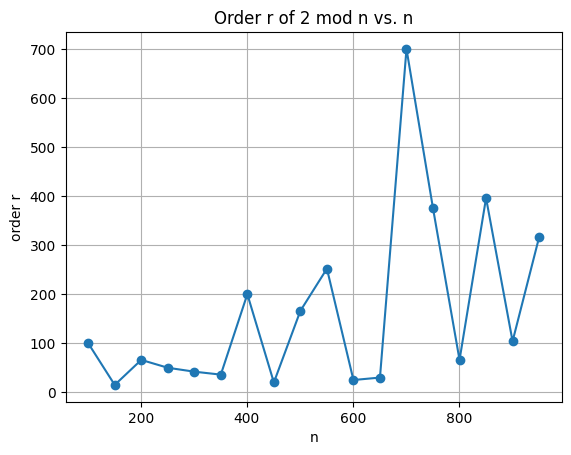

In [ ]:
# Dataframe + Plot 
# For order (r) vs n

results = []

# Only use odd n so that gcd(2,n) = 1 (they must be co-prime)
ns = [n for n in range(101, 1000, 25)] # integer from 101 to 951, increasing by 25
for n in ns:
    try:
        if gcd(2, n) != 1:
            continue  # skip invalid inputs early
        r, _, _ = classical_order_finding(2, n)
        results.append({'n': n, 'order': r})
    except:
        continue

df = pd.DataFrame(results)
display(df)

plt.plot(df['n'], df['order'], marker='o')
plt.title("Order r of 2 mod n vs. n")
plt.xlabel("n")
plt.ylabel("order r")
plt.grid(True)
plt.show()


=> This chart shows how classical brute-force order finding behaves for increasing values of n.

Even with small steps in n, the required order r — and thus the number of iterations — can jump drastically.

For example, at n ≈ 700, r is 700.

Since classical algorithms must try each exponent in sequence, this quickly becomes exponential.

Shor’s algorithm, in contrast, finds the order in polynomial time using quantum phase estimation.

## 3. Quantum Order Finding with Shor's Algorithm

### 3.1 Overview of Shor's Algorithm (quick diagram or steps)
1. Choose a random a < n such that gcd(a, n) = 1
2. Use Quantum Phase Estimation (QPE) to find the order `r`
3. Use classical post-processing to extract factors


### 3.2 Circuit: Modular Multiplication Gate `U`
We define a unitary operator `U |b⟩ = |a * b mod n⟩`.
This gate is used in the QPE circuit to encode the periodicity.

In [61]:
# Placeholder: implement or load modular multiplication gate circuit

# def modular_multiplication_gate(a, n):
#     qc = QuantumCircuit(1)
#     qc.h(0) #Add Gates
# return qc
# qc.draw('mpl')
# visualize_transition(qc)

### 3.3 Quantum Phase Estimation
We apply QPE using the `U` gate to extract the phase, which relates to `r`.
- Circuit diagram
- Measurement outcome (ϕ ≈ s/r)
- Continued fraction → r

In [62]:
# Placeholder: build and simulate QPE circuit using Qiskit
# def quantum_order_finding(a, n):
#     ...
# return estimated_order

### 3.4 Results and Visualization
Plot the measurement results and analyze the most probable output state.
- Output: quantum circuit measured state
- If possible: animation or histogram showing most probable states
- Comment on success/failure, e.g., “r = 4 found in 75% of runs”

In [63]:
# Placeholder: visualize quantum measurement output (e.g., histogram)

## 4. Classical vs Quantum Order Finding
We summarize and compare efficiency, complexity, and results.
- Table: runtime / gate depth / success chance
- Plot if helpful
- Use visual to emphasize: quantum = exponential speedup

In [64]:
# Optional: create comparison table or plot
# Data: runtime or iteration counts vs problem size

## 5. Conlusion: Limitation and Final Thoughts (2 min)
- RSA encryption is **theoretically breakable** using quantum computing via Shor's algorithm.
- Why can't we break real RSA yet?
  - Qubit count
  - Coherence time
  - Gate fidelity
- Mention quantum-resistant crypto (brief)
- Conclude: quantum is promising, but not yet at threat to real RSA